# MVP Análise de Dados e Boas Práticas

**Nome:** Igor Venancio Moreira FREITAS

**Matrícula:**  4052025000494

**Dataset:** [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)


# Descrição do Problema

O conjunto de dados Stroke (AVC) é um conjunto de dados médicos que contém informações demográficas, condições de saúde e fatores de estilo de vida de pacientes. O objetivo principal é prever a ocorrência de derrame cerebral a partir desses fatores.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Idade avançada está associada a maior risco de AVC?
- Pacientes com hipertensão e doenças cardíacas têm maior probabilidade de AVC?
- Existe correlação entre nível de glicose e ocorrência de AVC?

## Tipo de Problema

Este é um problema de **classificação supervisionada binária**. Dado um conjunto de características demográficas, de saúde e estilo de vida (gênero, idade, hipertensão, doença cardíaca, estado civil, tipo de trabalho, tipo de residência, nível de glicose, IMC e status de tabagismo), o objetivo é prever se um paciente terá ou não um AVC (stroke = 0 para não, AVC = 1 para sim).

## Seleção de Dados
O dataset de AVC foi obtido a partir de registros médicos de pacientes e contém informações relevantes para análise de risco cardiovascular. O conjunto de dados já passou por uma etapa de pré-processamento inicial, sendo disponibilizado em formato CSV com 29 amostras e 12 variáveis.

Embora o dataset esteja estruturado e pronto para análise, será necessário realizar algumas etapas de limpeza e tratamento, especialmente para lidar com valores ausentes nas variáveis BMI (indicados como "N/A") e smoking_status (indicados como "Unknow").

## Atributos do Dataset
O dataset de AVC contém 5110 amostras de pacientes, com 12 atributos distribuídos entre variáveis preditoras e variável alvo. Possui os seguintes atributos:

- ***id*** (identificador único do paciente)
- ***gender*** (gênero: Male, Female)
- ***age*** (idade do paciente em anos)
- ***hypertension*** (hipertensão: 0 = Não, 1 = Sim)
- ***heart_disease*** (doença cardíaca: 0 = Não, 1 = Sim)
- ***ever_married*** (estado civil: Yes, No)
- ***work_type*** (tipo de trabalho: Private, Self-employed, Govt_job)
- ***Residence_type*** (tipo de residência: Urban, Rural)
- ***avg_glucose_level*** (nível médio de glicose no sangue)
- ***bmi*** (Índice de Massa Corporal - contém valores ausentes "N/A")
- ***smoking_status*** (status de tabagismo: never smoked, formerly smoked, smokes, Unknown)
- ***AVC*** (ocorrência de AVC: 0 = Não, 1 = Sim - variável alvo)


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset AVC.

In [25]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")

In [26]:
# guardo o dataset em um dataframe
url = "https://raw.githubusercontent.com/venancioigor/puc_mvp_datasets/refs/heads/master/stroke-dataset.csv"
df = pd.read_csv(url)

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Stroke, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias
O dataset de AVC possui 5.110 instâncias (observações), representando registros médicos de pacientes. O conjunto de dados apresenta uma distribuição de tipos variada: 3 atributos são do tipo float64 (age, avg_glucose_level, bmi), 4 atributos são do tipo int64 (id, hypertension, heart_disease, stroke), e 5 atributos são categóricos do tipo object (gender, ever_married, work_type, Residence_type, smoking_status). Importante notar que a variável 'bmi' apresenta 601 valores ausentes (4909 valores não-nulos de 5110 total), indicando a necessidade de tratamento desses dados faltantes durante o pré-processamento.

In [28]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 5110

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


Text(0.5, 1.0, 'Percentual de Casos de Stroke')

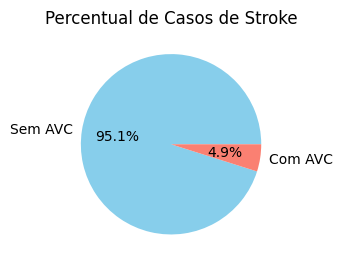

In [29]:
# Subplot 2: Percentual
plt.subplot(1, 2, 2)
stroke_pct = df['stroke'].value_counts(normalize=True) * 100
plt.pie(stroke_pct.values, labels=['Sem AVC', 'Com AVC'], autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'])
plt.title('Percentual de Casos de Stroke')

O gráfico de pizza mostra uma distribuição significativamente desbalanceada entre os casos de AVC: a grande maioria dos pacientes (aproximadamente 95.1%) não teve AVC, enquanto apenas uma pequena parcela (4.9%) teve AVC, confirmando que o dataset apresenta desequilíbrio de classes típico de problemas médicos onde a condição estudada é relativamente rara na população.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [30]:
# Estatísticas das variáveis numéricas
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
print("Estatísticas descritivas das variáveis numéricas:")
print(df[numeric_cols].describe())


Estatísticas descritivas das variáveis numéricas:
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


### Média

Pode-se notar que a média de idade é de 43 anos, a média do nível de glicose é 106.14 e a média de BMI é 28.89

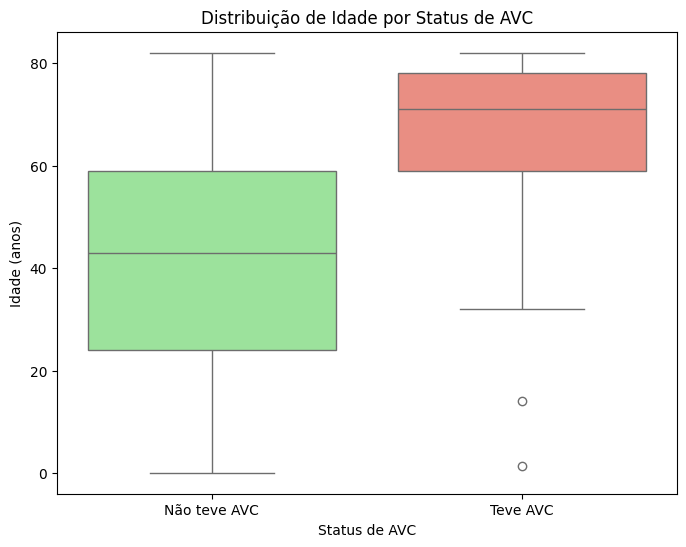

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df, palette=['lightgreen', 'salmon'])
plt.title('Distribuição de Idade por Status de AVC')
plt.xlabel('Status de AVC')
plt.ylabel('Idade (anos)')
plt.xticks([0, 1], ['Não teve AVC', 'Teve AVC'])
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [32]:
# desvio padrão dos atributos numéricos do dataset
df[['age', 'avg_glucose_level', 'bmi']].describe().loc['std']

age                  22.612647
avg_glucose_level    45.283560
bmi                   7.854067
Name: std, dtype: float64

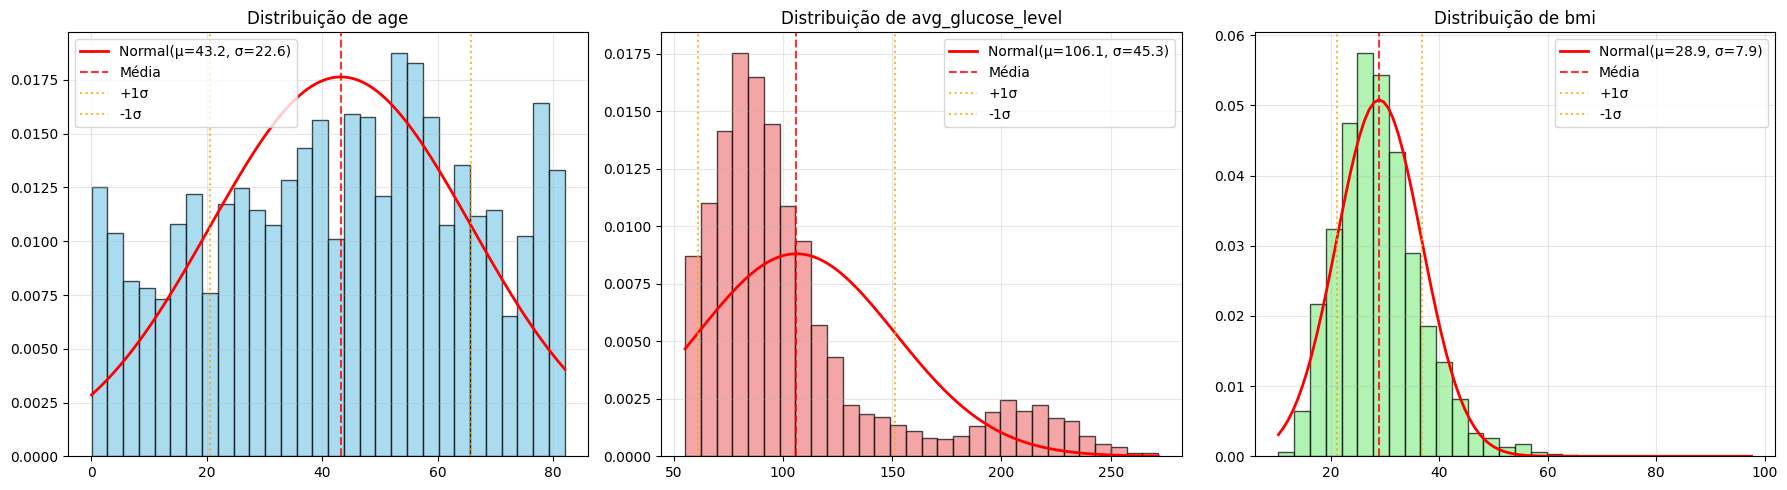

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    media = data.mean()
    desvio = data.std()
    
    # Histograma
    axes[i].hist(data, bins=30, density=True, alpha=0.7, 
                color=['skyblue', 'lightcoral', 'lightgreen'][i],
                edgecolor='black')
    
    # Curva normal teórica
    x = np.linspace(data.min(), data.max(), 100)
    axes[i].plot(x, stats.norm.pdf(x, media, desvio), 'r-', linewidth=2, 
                label=f'Normal(μ={media:.1f}, σ={desvio:.1f})')
    
    # Linhas de referência
    axes[i].axvline(media, color='red', linestyle='--', alpha=0.8, label='Média')
    axes[i].axvline(media + desvio, color='orange', linestyle=':', alpha=0.8, label='+1σ')
    axes[i].axvline(media - desvio, color='orange', linestyle=':', alpha=0.8, label='-1σ')
    
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

O desvio padrão de idade e nível de glicose está relativamente alto, indicando uma alta volatilidade desses dados.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

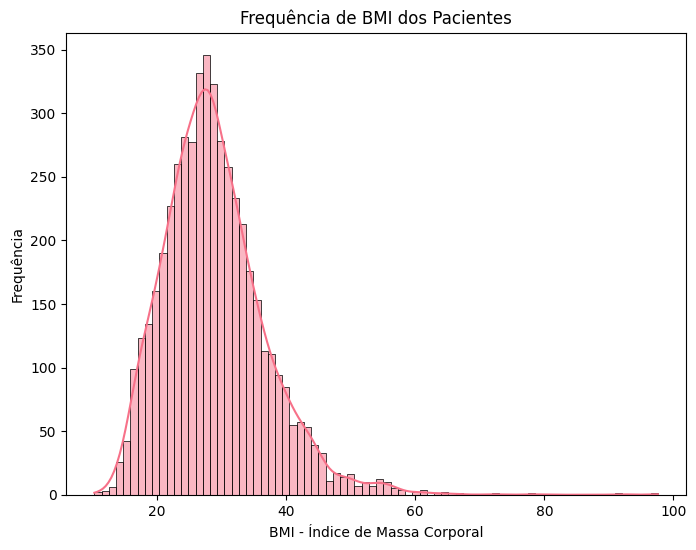

In [34]:
plt.figure(figsize=(8, 6))
# Histograma da idade dos pacientes
sns.histplot(df['bmi'], kde=True)
plt.title('Frequência de BMI dos Pacientes')
plt.xlabel('BMI - Índice de Massa Corporal')
plt.ylabel('Frequência')
plt.show()

Analisando o gráfico acima, pode-se dizer que esta distribuição é unimodal e aproximadamente normal (ou próxima à distribuição normal).

Características observadas:

Unimodal: Há apenas um pico (moda) principal, localizado aproximadamente entre 25-30 de BMI.

Assimetria positiva (right-skewed): A distribuição tem uma "cauda" mais longa à direita, com alguns valores mais altos de BMI se estendendo até próximo de 100.

Concentração central: A maior parte dos dados está concentrada na região central (20-35 BMI), que corresponde aos valores mais comuns na população.

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


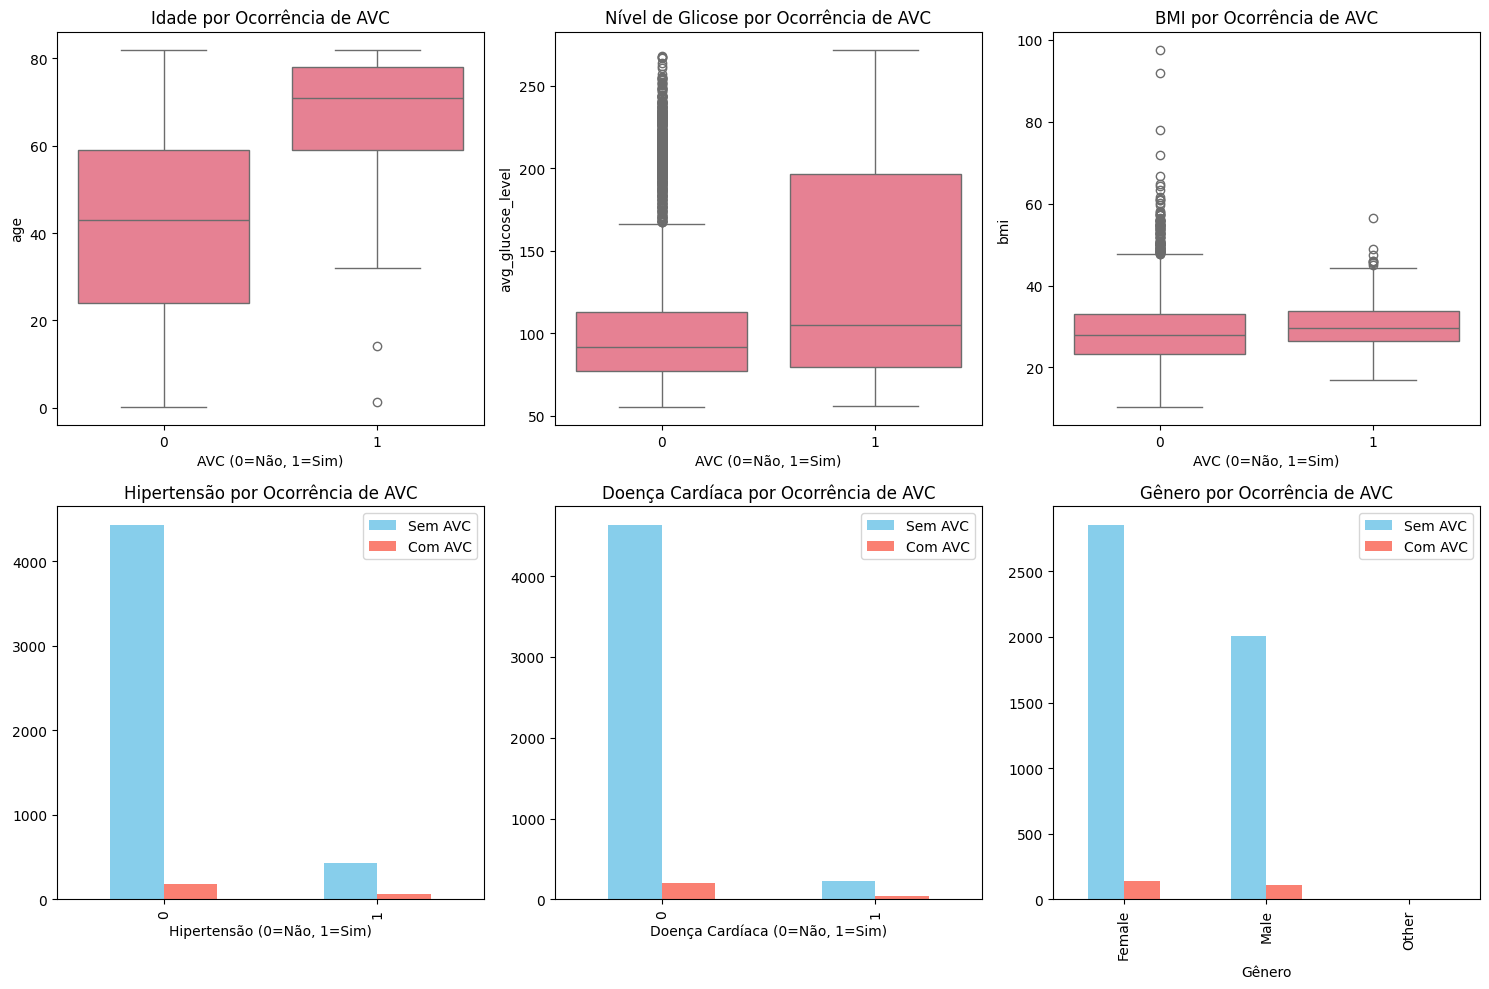

In [35]:

plt.figure(figsize=(15, 10))

# Idade por AVC
plt.subplot(2, 3, 1)
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Idade por Ocorrência de AVC')
plt.xlabel('AVC (0=Não, 1=Sim)')

# Glicose por AVC
plt.subplot(2, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Nível de Glicose por Ocorrência de AVC')
plt.xlabel('AVC (0=Não, 1=Sim)')

# BMI por AVC
plt.subplot(2, 3, 3)
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI por Ocorrência de AVC')
plt.xlabel('AVC (0=Não, 1=Sim)')

# Hipertensão por AVC
plt.subplot(2, 3, 4)
crosstab_hyp = pd.crosstab(df['hypertension'], df['stroke'])
crosstab_hyp.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon'])
plt.title('Hipertensão por Ocorrência de AVC')
plt.xlabel('Hipertensão (0=Não, 1=Sim)')
plt.legend(['Sem AVC', 'Com AVC'])

# Doença Cardíaca por AVC
plt.subplot(2, 3, 5)
crosstab_heart = pd.crosstab(df['heart_disease'], df['stroke'])
crosstab_heart.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon'])
plt.title('Doença Cardíaca por Ocorrência de AVC')
plt.xlabel('Doença Cardíaca (0=Não, 1=Sim)')
plt.legend(['Sem AVC', 'Com AVC'])

# Gênero por AVC
plt.subplot(2, 3, 6)
crosstab_gender = pd.crosstab(df['gender'], df['stroke'])
crosstab_gender.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon'])
plt.title('Gênero por Ocorrência de AVC')
plt.xlabel('Gênero')
plt.legend(['Sem AVC', 'Com AVC'])

plt.tight_layout()
plt.show()

## Quais impressões o boxplot trouxe?

Pelos gráficos boxplot acima pode-se perceber que parece existir uma correlação entre idade, glicose e ocorrência de AVC. Enquanto que hipertensão, doença cardiáca, gênero e BMI não parecem ter correlação.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

Primeiro é preciso converter as variáveis categórias para numéricas

In [36]:
# 1. Criando uma cópia do dataframe para transformações
df_corr = df.copy()

# 2. Convertendo variáveis categóricas para numéricas
# Gender: Male=1, Female=0
df_corr['gender_num'] = (df_corr['gender'] == 'Male').astype(int)

# Ever_married: Yes=1, No=0
df_corr['ever_married_num'] = (df_corr['ever_married'] == 'Yes').astype(int)

# Work_type: vamos usar Label Encoding ou One-Hot
from sklearn.preprocessing import LabelEncoder
le_work = LabelEncoder()
df_corr['work_type_num'] = le_work.fit_transform(df_corr['work_type'])

# Residence_type: Urban=1, Rural=0
df_corr['residence_num'] = (df_corr['Residence_type'] == 'Urban').astype(int)

# Smoking_status: vamos criar variáveis dummy
smoking_dummies = pd.get_dummies(df_corr['smoking_status'], prefix='smoking')
df_corr = pd.concat([df_corr, smoking_dummies], axis=1)

# 3. Selecionando apenas variáveis numéricas para correlação
numeric_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 
                'bmi', 'stroke', 'gender_num', 'ever_married_num', 
                'residence_num', 'work_type_num']

# Adicionando variáveis de smoking se existirem
smoking_cols = [col for col in df_corr.columns if col.startswith('smoking_')]
numeric_vars.extend(smoking_cols)

# Removendo valores NaN se houver
df_numeric = df_corr[numeric_vars].dropna()

# Removendo a coluna 'smoking_status' original, pois já temos as dummies
df_numeric.drop('smoking_status', axis=1, inplace=True)


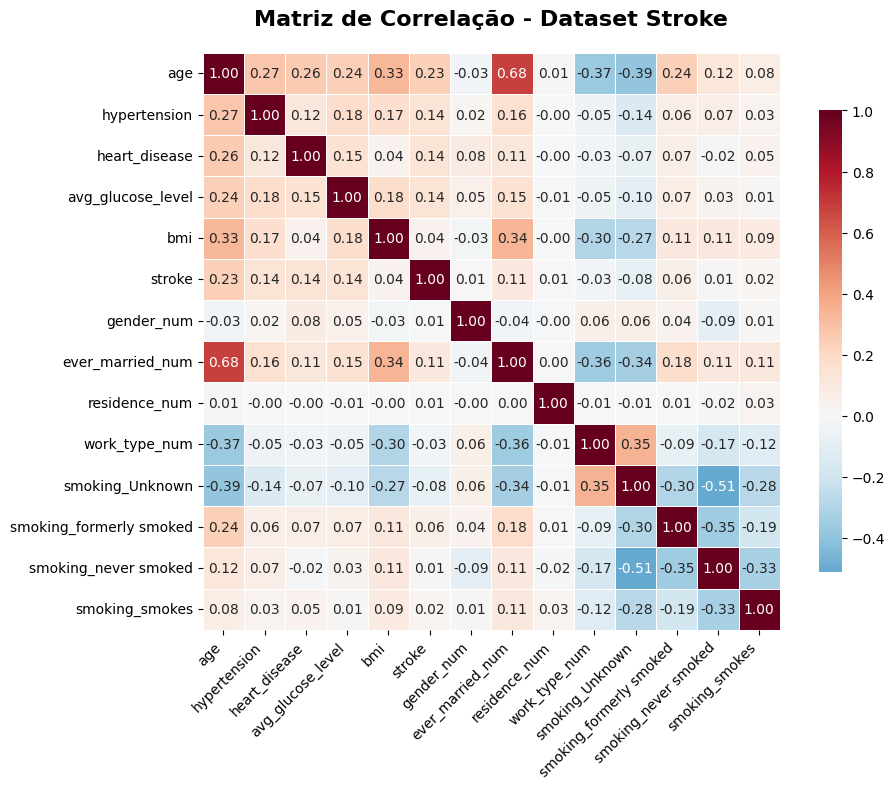

In [37]:
# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar a matriz de correlação com estilo similar
sns.heatmap(correlation_matrix, 
            annot=True,                    # Mostrar os números
            cmap='RdBu_r',                # Paleta de cores (vermelho-azul invertida)
            center=0,                     # Centro da escala de cores no 0
            square=True,                  # Células quadradas
            fmt='.2f',                    # Formato dos números (2 casas decimais)
            cbar_kws={'shrink': 0.8},     # Ajustar barra de cores
            annot_kws={'size': 10},       # Tamanho da fonte dos números
            linewidths=0.5,               # Linhas entre as células
            linecolor='white')            # Cor das linhas

# Personalizar o título
plt.title('Matriz de Correlação - Dataset Stroke', 
          fontsize=16, fontweight='bold', pad=20)

# Ajustar os rótulos dos eixos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Pelo mapa de calor é possível perceber que nesse dataset não há correlação entre idade, hipertensão, doença do coração e nível de glicose, todas estas estão próximas de zero.

A correlação mais forte está no fator idade e se a pessoa casou alguma vez. 

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [38]:
df_processed = df.copy()

In [39]:
# BMI: preencher com mediana
median_bmi = df_processed['bmi'].median()
df_processed['bmi'].fillna(median_bmi, inplace=True)
print(f"BMI: preenchido {df['bmi'].isnull().sum()} valores com a mediana ({median_bmi:.2f})")

# Verificar se ainda há valores nulos
print(f"Valores nulos restantes: {df_processed.isnull().sum().sum()}")

## Separar Features e Target
# Remover coluna ID (não é feature)
if 'id' in df_processed.columns:
    df_processed = df_processed.drop('id', axis=1)

X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

print(f"\nDimensões de X (features): {X.shape}")
print(f"Dimensões de y (target): {y.shape}")

BMI: preenchido 201 valores com a mediana (28.10)
Valores nulos restantes: 0

Dimensões de X (features): (5110, 10)
Dimensões de y (target): (5110,)


In [40]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [41]:
print(f"\nDivisão dos dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Divisão dos dados:
X_train: (3577, 10)
X_test: (1533, 10)
y_train: (3577,)
y_test: (1533,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [42]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Identificar colunas categóricas e numéricas
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Codificar variáveis categóricas no conjunto de treino
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Dicionário para armazenar os encoders
encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col].astype(str))
    X_test_encoded[col] = le.transform(X_test[col].astype(str))
    encoders[col] = le
    
    print(f"Codificação de {col}:")
    for i, class_name in enumerate(le.classes_):
        print(f"  {class_name}: {i}")

Codificação de gender:
  Female: 0
  Male: 1
  Other: 2
Codificação de ever_married:
  No: 0
  Yes: 1
Codificação de work_type:
  Govt_job: 0
  Never_worked: 1
  Private: 2
  Self-employed: 3
  children: 4
Codificação de Residence_type:
  Rural: 0
  Urban: 1
Codificação de smoking_status:
  Unknown: 0
  formerly smoked: 1
  never smoked: 2
  smokes: 3


In [43]:
X_train_normalized = scaler_norm.fit_transform(X_train_encoded)
X_test_normalized = scaler_norm.transform(X_test_encoded)

In [44]:
# Converter de volta para DataFrame
X_train_norm_df = pd.DataFrame(X_train_normalized, columns=X_train_encoded.columns)
X_test_norm_df = pd.DataFrame(X_test_normalized, columns=X_test_encoded.columns)

In [45]:
print("Primeiras 5 linhas dos dados normalizados (treino):")
print(X_train_norm_df.head())

Primeiras 5 linhas dos dados normalizados (treino):
   gender       age  hypertension  heart_disease  ever_married  work_type  \
0     0.0  0.633789           0.0            0.0           1.0       0.00   
1     0.0  0.755859           0.0            0.0           1.0       0.50   
2     0.5  0.987793           0.0            1.0           0.0       0.75   
3     0.5  0.670410           0.0            0.0           1.0       0.75   
4     0.0  0.450684           0.0            0.0           1.0       0.50   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0             0.0           0.243375  0.143207        0.333333  
1             1.0           0.153264  0.318237        0.000000  
2             0.0           0.186363  0.233782        0.000000  
3             0.0           0.085172  0.216646        1.000000  
4             1.0           0.224079  0.315789        1.000000  


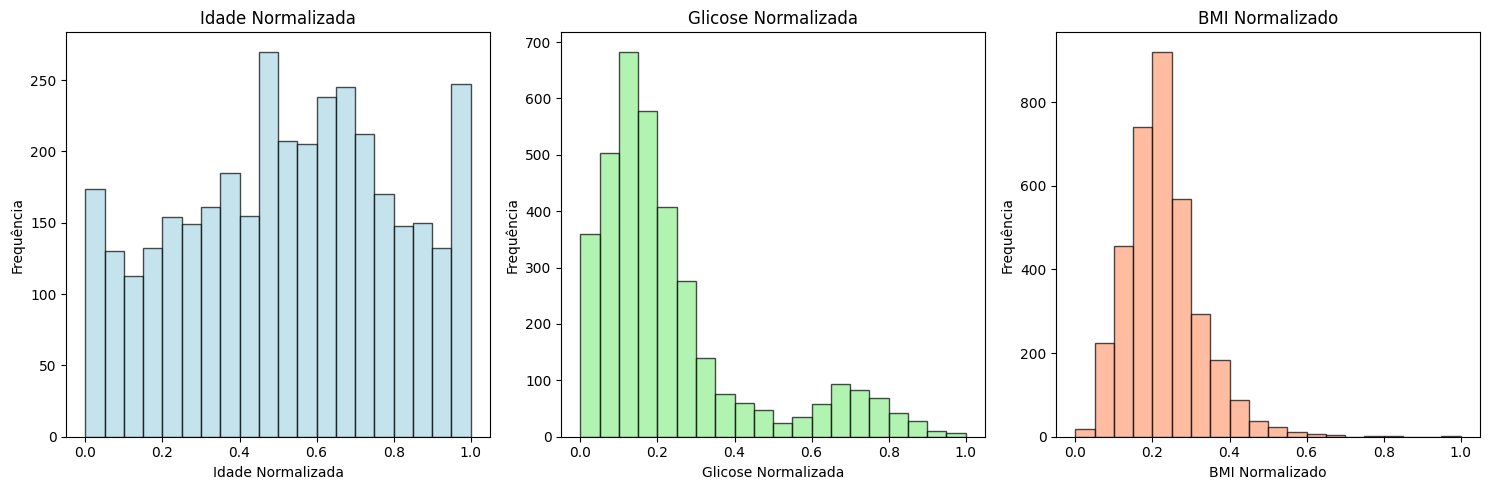

In [46]:
# Visualizar a distribuição após normalização
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(X_train_norm_df['age'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Idade Normalizada')
plt.xlabel('Idade Normalizada')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(X_train_norm_df['avg_glucose_level'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Glicose Normalizada')
plt.xlabel('Glicose Normalizada')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(X_train_norm_df['bmi'], bins=20, alpha=0.7, color='lightsalmon', edgecolor='black')
plt.title('BMI Normalizado')
plt.xlabel('BMI Normalizado')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Os histogramas de idade, glicose e BMI após a normalização mostram que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [47]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [48]:
X_train_standardized = scaler_std.fit_transform(X_train_encoded)
X_test_standardized = scaler_std.transform(X_test_encoded)

In [49]:
X_train_std_df = pd.DataFrame(X_train_standardized, columns=X_train_encoded.columns)
X_test_std_df = pd.DataFrame(X_test_standardized, columns=X_test_encoded.columns)


In [50]:
print("Primeiras 5 linhas dos dados padronizados (treino):")
print(X_train_std_df.head())

Primeiras 5 linhas dos dados padronizados (treino):
     gender       age  hypertension  heart_disease  ever_married  work_type  \
0 -0.841556  0.389044     -0.326194      -0.238816      0.717660  -2.006347   
1 -0.841556  0.833687     -0.326194      -0.238816      0.717660  -0.164041   
2  1.185545  1.678510     -0.326194       4.187324     -1.393417   0.757112   
3  1.185545  0.522437     -0.326194      -0.238816      0.717660   0.757112   
4 -0.841556 -0.277921     -0.326194      -0.238816      0.717660  -0.164041   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0       -1.008140           0.041892 -0.882617       -0.344159  
1        0.991925          -0.392475  0.963826       -1.281750  
2       -1.008140          -0.232925  0.072885       -1.281750  
3       -1.008140          -0.720699 -0.107886        1.531023  
4        0.991925          -0.051123  0.938002        1.531023  


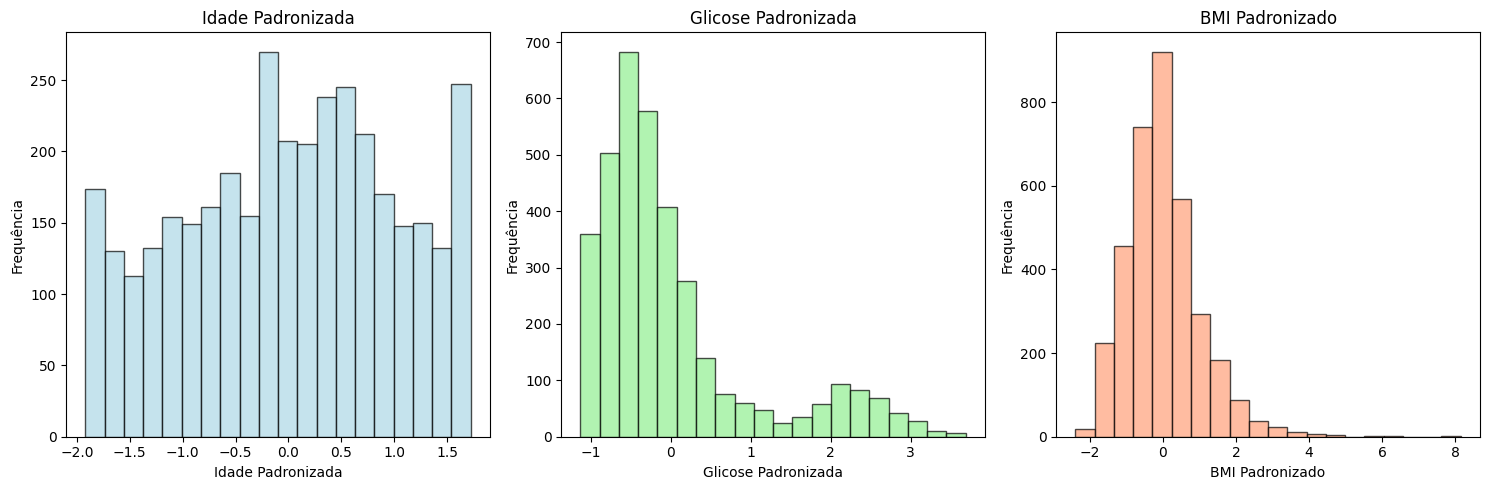

In [51]:

# Visualizar a distribuição após padronização
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(X_train_std_df['age'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Idade Padronizada')
plt.xlabel('Idade Padronizada')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(X_train_std_df['avg_glucose_level'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Glicose Padronizada')
plt.xlabel('Glicose Padronizada')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(X_train_std_df['bmi'], bins=20, alpha=0.7, color='lightsalmon', edgecolor='black')
plt.title('BMI Padronizado')
plt.xlabel('BMI Padronizado')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

"Os histogramas de idade, glicose e BMI após a padronização mostram que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição."

In [52]:
# Taxa de stroke por faixa etária
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                  bins=[0, 30, 50, 70, 100], 
                                  labels=['0-30', '31-50', '51-70', '71+'])

stroke_rate_by_age = df_processed.groupby('age_group')['stroke'].agg(['count', 'sum', 'mean'])
stroke_rate_by_age.columns = ['Total', 'Stroke_Cases', 'Stroke_Rate']
print("Taxa de stroke por faixa etária:")
print(stroke_rate_by_age)


Taxa de stroke por faixa etária:
           Total  Stroke_Cases  Stroke_Rate
age_group                                  
0-30        1570             2     0.001274
31-50       1413            21     0.014862
51-70       1417            98     0.069160
71+          710           128     0.180282


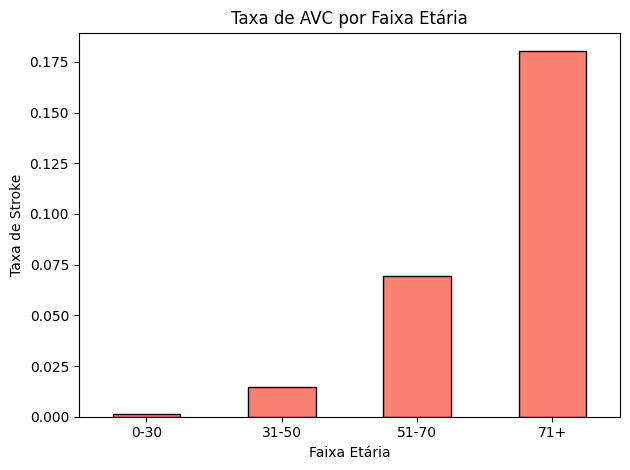

In [53]:
# Criando o gráfico de barras
stroke_rate_by_age['Stroke_Rate'].plot(kind='bar', color='salmon', edgecolor='black')

# Adicionando títulos e rótulos
plt.title('Taxa de AVC por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Stroke')
plt.xticks(rotation=0)  # Mantém os rótulos horizontais

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Com esse agrupamento por faixa etária parece que há sim uma correlação entre idade e AVC, mas o coeficiente de Pearse não conseguiu capturar por conta do desbalanceamento dos dados.

Por isso vou seguir com mais análises.

In [54]:
# Criando tabela de contingência
faixas = pd.cut(df['age'], bins=[0, 50, 100], labels=['≤50', '>50'])
tabela = pd.crosstab(faixas, df['stroke'])
print("Tabela de contingência:")
print(tabela)

# Calculando Odds Ratio manualmente
# Para >50 vs ≤50
a, b = tabela.loc['>50', 1], tabela.loc['>50', 0]  # AVC: sim, não (>50)
c, d = tabela.loc['≤50', 1], tabela.loc['≤50', 0]  # AVC: sim, não (≤50)

odds_ratio = (a * d) / (b * c)
print(f"\nOdds Ratio (>50 vs ≤50): {odds_ratio:.2f}")
print(f"Pessoas >50 anos têm {odds_ratio:.1f}x mais chance de AVC")

Tabela de contingência:
stroke     0    1
age              
≤50     2960   23
>50     1901  226

Odds Ratio (>50 vs ≤50): 15.30
Pessoas >50 anos têm 15.3x mais chance de AVC


In [55]:
# Teste de independência
chi2, p_value, dof, expected = chi2_contingency(tabela)
print(f"\nTeste Qui-quadrado:")
print(f"Chi2: {chi2:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Associação significativa: {'Sim' if p_value < 0.05 else 'Não'}")


Teste Qui-quadrado:
Chi2: 257.993
P-value: 0.000000
Associação significativa: Sim


In [56]:
# Criando tabela de contingência
faixas_glicose = pd.cut(df['avg_glucose_level'], bins=[0, 120, df['avg_glucose_level'].max()], labels=['≤120', '>120'])
tabela_glicose = pd.crosstab(faixas_glicose, df['stroke'])
print("Tabela de contingência (glicose):")
print(tabela_glicose)

# Calculando Odds Ratio manualmente
# Para >100 vs ≤100
a, b = tabela_glicose.loc['>120', 1], tabela_glicose.loc['>120', 0]  # AVC: sim, não (>100)
c, d = tabela_glicose.loc['≤120', 1], tabela_glicose.loc['≤120', 0]  # AVC: sim, não (≤100)

odds_ratio_glicose = (a * d) / (b * c)
print(f"\nOdds Ratio (>120 vs ≤120): {odds_ratio_glicose:.2f}")
print(f"Pessoas com glicose >120 têm {odds_ratio_glicose:.1f}x mais chance de AVC")

Tabela de contingência (glicose):
stroke                0    1
avg_glucose_level           
≤120               3844  147
>120               1017  102

Odds Ratio (>120 vs ≤120): 2.62
Pessoas com glicose >120 têm 2.6x mais chance de AVC


In [57]:
# Teste de independência
chi2, p_value, dof, expected = chi2_contingency(tabela_glicose)
print(f"\nTeste Qui-quadrado:")
print(f"Chi2: {chi2:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Associação significativa: {'Sim' if p_value < 0.05 else 'Não'}")


Teste Qui-quadrado:
Chi2: 54.467
P-value: 0.000000
Associação significativa: Sim


# Conclusão

A análise e pré-processamento do dataset Stroke que é fundamental entender os dados e tratá-los antes da modelagem. O dataset, como vimos, é desbalanceado, mas é limpo, permitindo uma análise das relações entre idade, nível de glicose no sangue, entre outros e AVC. A análise exploratória revelou informações relevantes sobre as correlações entre as características observadas e a importância dos gráficos para melhor visualizarmos o que os dados representam. Foi a partir do boxplot de idade que ficou clara a relação entre idade e AVC. A normalização e padronização dos dados representam processos essenciais na preparação de conjuntos de dados para algoritmos de machine learning. Essas técnicas asseguram que os modelos possam extrair padrões e relações de forma otimizada, melhorando significativamente a performance e convergência dos algoritmos de aprendizado.

As duas hipóteses levantadas foram validadas:

1.   *Idade avançada está associada a maior risco de AVC?* Sim, pessoas acima de 50 anos têm 15.3x mais chance de ter AVC segundo o Odds ratio.

2.   *Existe correlação entre nível de glicose e ocorrência de AVC?* Sim, pessoas que tem uma glicose acima de 120 tem 2.6x mais chance de terem AVC.
